<a href="https://colab.research.google.com/github/gndumbri/Thinkful-Capstone-1---Experimental-Design/blob/master/Education_Data_Set_Capstone_1_Admission_Requirements_Gabe_Dumbrille.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This capstone looks at the effect of admission requirements on graduation at post-secondary institutions. These requirements exist to limit the volume of applications, but do they also help in selecting students that will go on to graduate? 

That question is the central question I aim to answer in this project. I will be looking for a positive impact of admission requirements on graduation (i.e. the admission requirements do positively impact the selection of applicants who will go on to graduate).

I will be looking at institutions that meet the following criteria:
- Have data for completion rates at the 100, 150, and 200 percent of normal time rate
("normal time" defined as the "normal" amount of time needed to complete the degree. For example, if "normal time" for a degree at a University is 4 years, then 100% completion rate would mean 4 years, 150% completion rate would mean 6 years, and a 200% completion rate would mean 8 years)

- Do not use an open admissions process

This project is of great interest to me as I have 7 years experience working in higher education, and currently work in an admissions capacity. Additionally, with college admissions a recent topic in the news, this project should shed some light on the role of admission requirements, and their ability to aid in successful student selection.



# Hypothesis

**Ho:** The amount of admission requirements will have no significant correlation with graduation at the following timeframes:: 100% of normal time, 150% of normal time, or 200% of normal time.

**Ha:** There will be a positive and significant correlation between the amount of admission requirements and graduation at the following timeframes: 100% of normal time, 150% of normal time, or 200% of normal time.

# Data

The data comes from the [Education Data](https://https://educationdata.urban.org/data-explorer/colleges/) set and there are 22050 records, and 57 variables.

There are several missing values in the data, but I am removing records where missing values exist for the key metric of completion rates at the 100, 150 and 200 percent of normal time rates, and I will be creating variables to do my analysis. Additionally I am removing records where the institutions use an open admission policy.

The final data will have 3192 records for each of the 100, 150, and 200 percent of normal time completion rates.

# Analysis

In [0]:
# set up notebook for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns

!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
# load .csv file
link = 'https://drive.google.com/open?id=1nQa_BpmJjS451_GAXorEFQyaI4XLy9Fz'
fluff, id = link.split('=')

downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('EducationDataPortal_12.01.2019_institutions.csv')  

# load data
ed_data = pd.read_csv('EducationDataPortal_12.01.2019_institutions.csv')

# get info about data
ed_data.info()
ed_data.shape

## Methods

I decided to quantify the amount of admission requirements by counting the amount of times each variable below had the value "Required". That count would then be totaled and those numbers would be stored in a new column called "count_required".

I then proceeded to check the data I would be analyzing for normality using histograms and the Shapiro-Wilk test.

Once the data passed checks for normality, I proceeded to look at preliminary correlations between count_required and the completion rates at 100, 150, and 200 percent of normal time.

In [0]:
# find values for each admission requirement

for column in ed_data.iloc[:,np.r_[9:19, 22:27]]:
    print(column)
    print(ed_data[column].unique())
    print()


I did not use the "years_college_required" requirement since there were several values for that variable that should be analyzed separately.

In [0]:
# engineer features count_required, count_required_merit, and count_required_other

col_all = ['reqt_hs_rank', 'reqt_test_scores', 'reqt_other_test', 'reqt_toefl', 'reqt_hs_gpa', 'reqt_hs_record', 'reqt_college_prep', 'reqt_recommendations', 'reqt_competencies']
col_merit = ['reqt_hs_rank', 'reqt_test_scores', 'reqt_other_test', 'reqt_toefl', 'reqt_hs_gpa', 'reqt_hs_record']
col_other = ['reqt_college_prep', 'reqt_recommendations', 'reqt_competencies']

req_all = ed_data[col_all] == 'Required'
req_merit = ed_data[col_merit] == 'Required'
req_other = ed_data[col_other] == 'Required'

ed_data['count_required'] = req_all.sum(axis=1)
ed_data['count_required_merit'] = req_merit.sum(axis=1)
ed_data['count_required_other'] = req_other.sum(axis=1)


In [0]:
# clean data

ed_data_no_open = ed_data[(ed_data['open_admissions_policy'] == 'No')]
data_grads = ed_data_no_open.dropna(subset=['completion_rate_100pct', 'completion_rate_150pct', 'completion_rate_200pct'])
data_grads_1 = data_grads.drop(data_grads.columns[4:9], axis=1)
data_grads_2 = data_grads_1.drop(data_grads_1.columns[14:17], axis=1)
data_grads_3 = data_grads_2.drop(data_grads_2.columns[19:39], axis=1)
data_no_completer = data_grads_3.drop(columns=['completion_rate_8yr', 'completion_rate_6yr', 'completers', 'count_merit', 'count_other'], axis=1)
data_clean = data_no_completer.drop(columns=['completers_100pct', 'completers_150pct', 'completers_200pct','reqt_hs_diploma', 'reqt_sat_scores', 'reqt_residence', 'reqt_ability_to_benefit', 'reqt_age', 'reqt_other'], axis=1)
data_grads_clean = data_clean.dropna()
data_grads_clean.info()

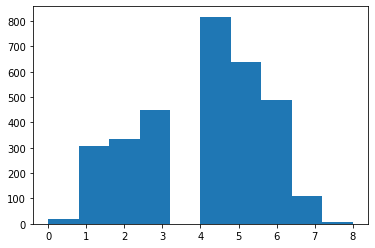

(0.9477762579917908, 3.34558887168111e-32)
DescribeResult(nobs=3179, minmax=(0, 8), mean=3.958477508650519, variance=2.7081557681377815, skewness=-0.24459171141303082, kurtosis=-0.6503609534969548)


In [0]:
# test count_required for normality

plt.hist(data_grads_clean['count_required'])
plt.show()
print(stats.shapiro(data_grads_clean['count_required']))
print(stats.describe(data_grads_clean['count_required']))


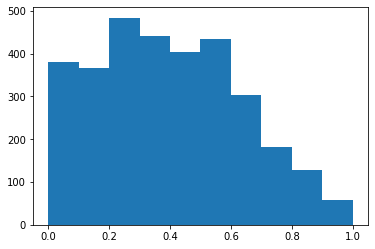

(0.9769073128700256, 2.5895344974466877e-22)
DescribeResult(nobs=3179, minmax=(0.0, 1.0), mean=0.39486945580371186, variance=0.05723864720709834, skewness=0.2810582518812222, kurtosis=-0.6881893286538032)


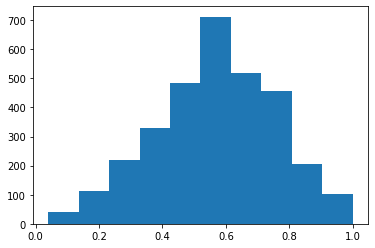

(0.994278609752655, 7.853524497392073e-10)
DescribeResult(nobs=3179, minmax=(0.04, 1.0), mean=0.5680764391318024, variance=0.03556319207844272, skewness=-0.1935418881908813, kurtosis=-0.2926650300550575)


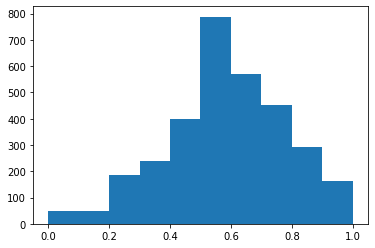

(0.9904258251190186, 8.650494735676709e-14)
DescribeResult(nobs=3179, minmax=(0.0, 1.0), mean=0.5868354828562441, variance=0.03891049872798421, skewness=-0.3023963850337264, kurtosis=0.00644146227888065)


In [0]:
# test completion_rate_100pct for normality

plt.hist(data_grads_clean['completion_rate_100pct'])
plt.show()
print(stats.shapiro(data_grads_clean['completion_rate_100pct']))
print(stats.describe(data_grads_clean['completion_rate_100pct']))

# test completion_rate_150pct for normality

plt.hist(data_grads_clean['completion_rate_150pct'])
plt.show()
print(stats.shapiro(data_grads_clean['completion_rate_150pct']))
print(stats.describe(data_grads_clean['completion_rate_150pct']))

# test completion_rate_200pct for normality

plt.hist(data_grads_clean['completion_rate_200pct'])
plt.show()
print(stats.shapiro(data_grads_clean['completion_rate_200pct']))
print(stats.describe(data_grads_clean['completion_rate_200pct']))

Based on the Shapiro-Wilk result and a visual inspection of the data, the data do not fit a normal distribution.

In [0]:
# correlations

print(stats.pearsonr(data_grads_clean['count_required'], data_grads_clean['completion_rate_100pct']))
print(stats.pearsonr(data_grads_clean['count_required'], data_grads_clean['completion_rate_150pct']))
print(stats.pearsonr(data_grads_clean['count_required'], data_grads_clean['completion_rate_200pct']))

(0.06994966701118993, 7.906060700871676e-05)
(0.08804489456430618, 6.629743305386797e-07)
(0.047267205326140926, 0.007687606811502838)


The correlations are almost non-existent, and all p-values are significant for count_required. 

Will proceed to test data for variance using Kruskal-Wallis due to the non-normal distribution. This should shed some light on the central question of "amount" of admission requirements and their impact on completion rates. 





Following the initial analysis I did not see a compelling correlation visually or statistically between count_required and completion rates at the 100, 150, and 200 percent of normal time. 

I therefore decided to investigate further with the curiosity that there could be a Simpson's Paradox effect. That is, while the overall correlation did not exist, there was a weak correlation with the count_required_other feature. I wanted to see if there may be specific amounts of admission requirements that do correlate to the completion rates mentioned above.

To do this, I divided the data into 4 quartiles based on the quartiles of the count_required column and proceeded to test those data for normality using the same process as I did earlier for normality testing.

In [0]:
# find quartiles for count_required

data_grads_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
year,3179.0,2011.123938,2.877790,2007.00,2009.000,2011.000,2014.000,2016.0
unitid,3179.0,208041.565587,82442.583466,142887.00,150774.000,172440.000,238166.000,482671.0
completion_rate_100pct,3179.0,0.394869,0.239246,0.00,0.210,0.380,0.570,1.0
completion_rate_200pct,3179.0,0.586835,0.197257,0.00,0.470,0.590,0.730,1.0
completion_rate_150pct,3179.0,0.568076,0.188582,0.04,0.443,0.573,0.705,1.0
count_required,3179.0,3.958478,1.645648,0.00,3.000,4.000,5.000,8.0
count_requied_merit,3179.0,3.227745,1.332074,0.00,2.000,4.000,4.000,6.0
count_required_other,3179.0,0.730733,0.717380,0.00,0.000,1.000,1.000,3.0
count_required_merit,3179.0,3.227745,1.332074,0.00,2.000,4.000,4.000,6.0


In [0]:
# split dataframe into separate dataframes by quartile for comparison 
# of completion rates based on quartile for count_required

data_4th = data_grads_clean[(data_grads_clean['count_required'] <= 3)]
data_3rd = data_grads_clean[(data_grads_clean['count_required'] == 4)]
data_2nd = data_grads_clean[(data_grads_clean['count_required'] == 5)]
data_1st = data_grads_clean[(data_grads_clean['count_required'] > 5)]

# view sample size of each

print(data_4th.shape)
print(data_3rd.shape)
print(data_2nd.shape)
print(data_1st.shape)

(1112, 20)
(817, 20)
(640, 20)
(610, 20)


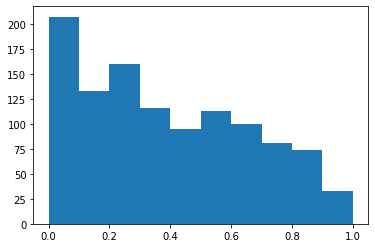

(0.9487158060073853, 3.1456536152170554e-19)
DescribeResult(nobs=1112, minmax=(0.0, 1.0), mean=0.386501798561151, variance=0.07694715751251384, skewness=0.32798583803605214, kurtosis=-1.0051071624569317)


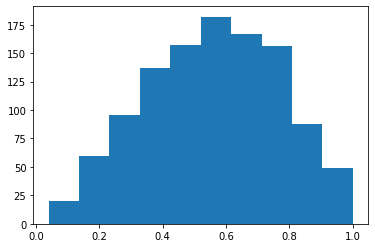

(0.9894372224807739, 3.5784756846624077e-07)
DescribeResult(nobs=1112, minmax=(0.04, 1.0), mean=0.5578902877697842, variance=0.04479881423502063, skewness=-0.11075731677225639, kurtosis=-0.6665830733600369)


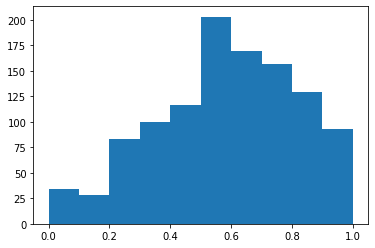

(0.980658769607544, 5.183501891603548e-11)
DescribeResult(nobs=1112, minmax=(0.0, 1.0), mean=0.5859802158273382, variance=0.05507752616088947, skewness=-0.3425341833672654, kurtosis=-0.4531839802390123)


In [0]:
# test 4th quartile for normality at each completion rate

plt.hist(data_4th['completion_rate_100pct'])
plt.show()
print(stats.shapiro(data_4th['completion_rate_100pct']))
print(stats.describe(data_4th['completion_rate_100pct']))

plt.hist(data_4th['completion_rate_150pct'])
plt.show()
print(stats.shapiro(data_4th['completion_rate_150pct']))
print(stats.describe(data_4th['completion_rate_150pct']))

plt.hist(data_4th['completion_rate_200pct'])
plt.show()
print(stats.shapiro(data_4th['completion_rate_200pct']))
print(stats.describe(data_4th['completion_rate_200pct']))

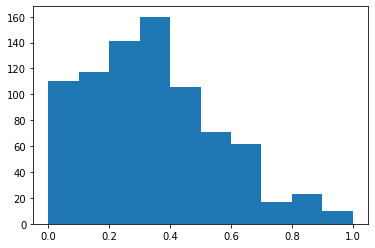

(0.9619608521461487, 9.766816397522096e-14)
DescribeResult(nobs=817, minmax=(0.0, 1.0), mean=0.3447980416156671, variance=0.04661494078047376, skewness=0.6166631866313645, kurtosis=-0.054097737142612345)


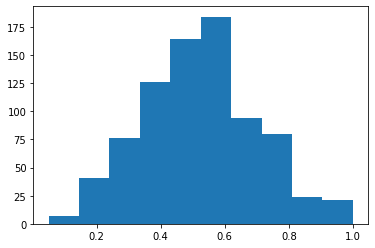

(0.9932306408882141, 0.0009267159621231258)
DescribeResult(nobs=817, minmax=(0.05, 1.0), mean=0.5212362301101592, variance=0.03194082525439797, skewness=0.19131594858780424, kurtosis=-0.19053446885452185)


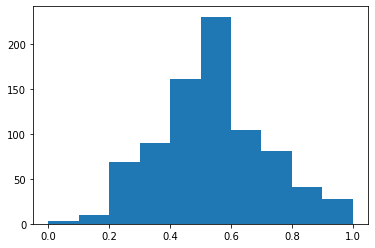

(0.9914730191230774, 0.00011678191367536783)
DescribeResult(nobs=817, minmax=(0.0, 1.0), mean=0.5362301101591187, variance=0.03222376070991432, skewness=0.20635108609980124, kurtosis=-0.062105598508030546)


In [0]:
# test 3rd quartile for normality at each completion rate

plt.hist(data_3rd['completion_rate_100pct'])
plt.show()
print(stats.shapiro(data_3rd['completion_rate_100pct']))
print(stats.describe(data_3rd['completion_rate_100pct']))

plt.hist(data_3rd['completion_rate_150pct'])
plt.show()
print(stats.shapiro(data_3rd['completion_rate_150pct']))
print(stats.describe(data_3rd['completion_rate_150pct']))

plt.hist(data_3rd['completion_rate_200pct'])
plt.show()
print(stats.shapiro(data_3rd['completion_rate_200pct']))
print(stats.describe(data_3rd['completion_rate_200pct']))

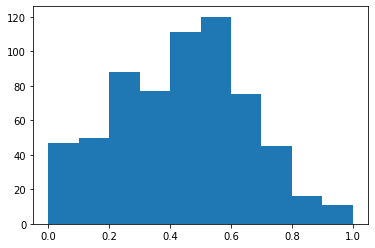

(0.9897404909133911, 0.00019085968961007893)
DescribeResult(nobs=640, minmax=(0.0, 1.0), mean=0.4379375, variance=0.04740387715179969, skewness=0.06811336675525853, kurtosis=-0.4794796764515623)


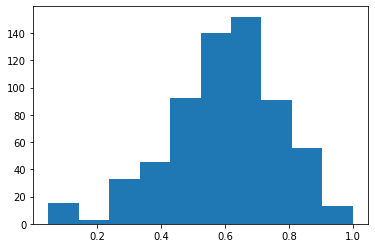

(0.9789499044418335, 5.820676918233403e-08)
DescribeResult(nobs=640, minmax=(0.048, 1.0), mean=0.5988515624999999, variance=0.030230599215082157, skewness=-0.5618090706192469, kurtosis=0.5111417721880205)


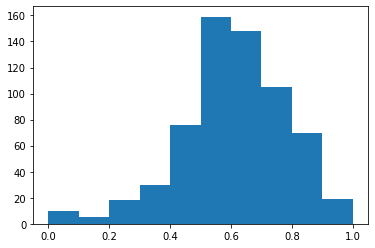

(0.9804513454437256, 1.5341508685651206e-07)
DescribeResult(nobs=640, minmax=(0.0, 1.0), mean=0.612375, variance=0.030394037558685447, skewness=-0.5078075948369302, kurtosis=0.734553413311819)


In [0]:
# test 2nd quartile for normality at each completion rate

plt.hist(data_2nd['completion_rate_100pct'])
plt.show()
print(stats.shapiro(data_2nd['completion_rate_100pct']))
print(stats.describe(data_2nd['completion_rate_100pct']))

plt.hist(data_2nd['completion_rate_150pct'])
plt.show()
print(stats.shapiro(data_2nd['completion_rate_150pct']))
print(stats.describe(data_2nd['completion_rate_150pct']))

plt.hist(data_2nd['completion_rate_200pct'])
plt.show()
print(stats.shapiro(data_2nd['completion_rate_200pct']))
print(stats.describe(data_2nd['completion_rate_200pct']))

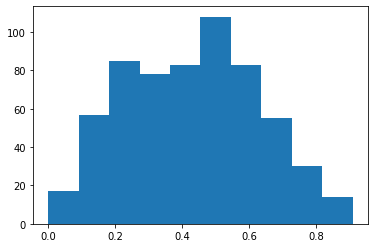

(0.98659348487854, 2.1719240976381116e-05)
DescribeResult(nobs=610, minmax=(0.0, 0.91), mean=0.432, variance=0.03929878489326766, skewness=0.05194899495903788, kurtosis=-0.7318428351027761)


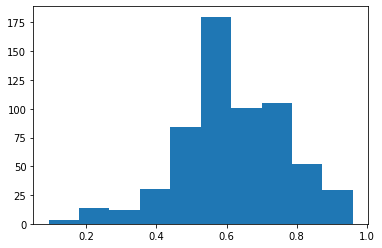

(0.9821650981903076, 8.740108796700952e-07)
DescribeResult(nobs=610, minmax=(0.09300000000000001, 0.96), mean=0.6170918032786885, variance=0.022804132773425932, skewness=-0.2915102909926676, kurtosis=0.4032799652803103)


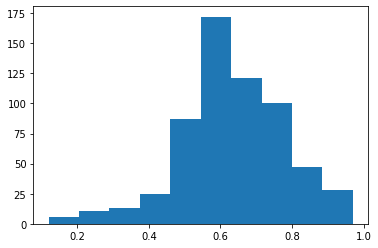

(0.9798624515533447, 1.9369232973076578e-07)
DescribeResult(nobs=610, minmax=(0.12, 0.97), mean=0.6293770491803279, variance=0.021569069423133864, skewness=-0.35319630239860156, kurtosis=0.6737193537305575)


In [0]:
# test 1st quartile for normality at each completion rate

plt.hist(data_1st['completion_rate_100pct'])
plt.show()
print(stats.shapiro(data_1st['completion_rate_100pct']))
print(stats.describe(data_1st['completion_rate_100pct']))

plt.hist(data_1st['completion_rate_150pct'])
plt.show()
print(stats.shapiro(data_1st['completion_rate_150pct']))
print(stats.describe(data_1st['completion_rate_150pct']))

plt.hist(data_1st['completion_rate_200pct'])
plt.show()
print(stats.shapiro(data_1st['completion_rate_200pct']))
print(stats.describe(data_1st['completion_rate_200pct']))



Once normality was tested, I again observed a result of non-normal distribution. 

Therefore to examine the variance among quartiles I decided to use the Kruskal-Wallis test.


In [0]:
# kruskal among quartiles for each completion rate

print(stats.kruskal(data_4th['completion_rate_100pct'], data_3rd['completion_rate_100pct'], data_2nd['completion_rate_100pct'], data_1st['completion_rate_100pct']))
print(stats.kruskal(data_4th['completion_rate_150pct'], data_3rd['completion_rate_150pct'], data_2nd['completion_rate_150pct'], data_1st['completion_rate_150pct']))
print(stats.kruskal(data_4th['completion_rate_200pct'], data_3rd['completion_rate_200pct'], data_2nd['completion_rate_200pct'], data_1st['completion_rate_200pct']))

KruskalResult(statistic=88.832012407627, pvalue=3.9030791016929045e-19)
KruskalResult(statistic=129.38722598763718, pvalue=7.330356561667707e-28)
KruskalResult(statistic=121.24737285835604, pvalue=4.157022108069733e-26)


In [0]:
# kruskal for 100pct completion rate

print(stats.kruskal(data_4th['completion_rate_100pct'], data_1st['completion_rate_100pct']))
print(stats.kruskal(data_4th['completion_rate_100pct'], data_2nd['completion_rate_100pct']))
print(stats.kruskal(data_4th['completion_rate_100pct'], data_3rd['completion_rate_100pct']))
print(stats.kruskal(data_3rd['completion_rate_100pct'], data_2nd['completion_rate_100pct']))
print(stats.kruskal(data_3rd['completion_rate_100pct'], data_1st['completion_rate_100pct']))
print(stats.kruskal(data_2nd['completion_rate_100pct'], data_1st['completion_rate_100pct']))

KruskalResult(statistic=19.919422438516996, pvalue=8.077553317241618e-06)
KruskalResult(statistic=22.484042538613032, pvalue=2.118965899840072e-06)
KruskalResult(statistic=5.175388798570038, pvalue=0.022909044194283402)
KruskalResult(statistic=71.05555372242125, pvalue=3.4730657812643096e-17)
KruskalResult(statistic=69.63245479065215, pvalue=7.145149464468543e-17)
KruskalResult(statistic=0.18605896545259132, pvalue=0.6662171501317476)


In [0]:
# kruskal for 150 pct completion rate

print(stats.kruskal(data_4th['completion_rate_150pct'], data_1st['completion_rate_150pct']))
print(stats.kruskal(data_4th['completion_rate_150pct'], data_2nd['completion_rate_150pct']))
print(stats.kruskal(data_4th['completion_rate_150pct'], data_3rd['completion_rate_150pct']))
print(stats.kruskal(data_3rd['completion_rate_150pct'], data_2nd['completion_rate_150pct']))
print(stats.kruskal(data_3rd['completion_rate_150pct'], data_1st['completion_rate_150pct']))
print(stats.kruskal(data_2nd['completion_rate_150pct'], data_1st['completion_rate_150pct']))

KruskalResult(statistic=31.707389210589273, pvalue=1.7923894213899657e-08)
KruskalResult(statistic=17.24082987535249, pvalue=3.292830078731599e-05)
KruskalResult(statistic=18.807339169072016, pvalue=1.446095915091429e-05)
KruskalResult(statistic=83.40868530523677, pvalue=6.67281769471315e-20)
KruskalResult(statistic=119.0309329229222, pvalue=1.0310898648179697e-27)
KruskalResult(statistic=1.3454937891362488, pvalue=0.24606744618353998)


In [0]:
# kruskal for 200 pct completion rate

print(stats.kruskal(data_4th['completion_rate_200pct'], data_1st['completion_rate_200pct']))
print(stats.kruskal(data_4th['completion_rate_200pct'], data_2nd['completion_rate_200pct']))
print(stats.kruskal(data_4th['completion_rate_200pct'], data_3rd['completion_rate_200pct']))
print(stats.kruskal(data_3rd['completion_rate_200pct'], data_2nd['completion_rate_200pct']))
print(stats.kruskal(data_3rd['completion_rate_200pct'], data_1st['completion_rate_200pct']))
print(stats.kruskal(data_2nd['completion_rate_200pct'], data_1st['completion_rate_200pct']))

KruskalResult(statistic=9.191657949531292, pvalue=0.002431205767480491)
KruskalResult(statistic=2.991939813548994, pvalue=0.0836798725978446)
KruskalResult(statistic=38.09585270624665, pvalue=6.735314090518753e-10)
KruskalResult(statistic=81.87876918723966, pvalue=1.4469530233656135e-19)
KruskalResult(statistic=123.28794164594652, pvalue=1.206117206221024e-28)
KruskalResult(statistic=1.715974865580872, pvalue=0.1902119937047603)


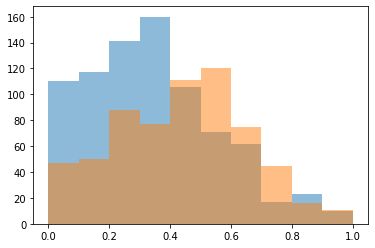

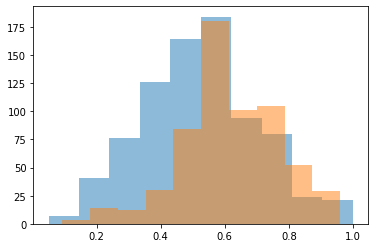

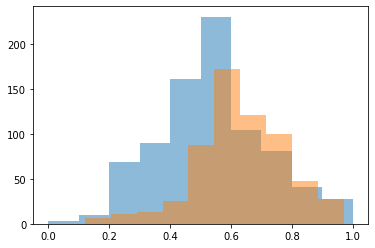

In [0]:
# visualizing difference among quartiles 100pct completion
# use largest difference value pair

plt.hist(data_3rd['completion_rate_100pct'], alpha=0.5)
plt.hist(data_2nd['completion_rate_100pct'], alpha=0.5)
plt.show()

# visualizing difference among quartiles 150pct completion
# use largest difference value pair

plt.hist(data_3rd['completion_rate_150pct'], alpha=0.5)
plt.hist(data_1st['completion_rate_150pct'], alpha=0.5)
plt.show()

# visualizing difference among quartiles 200pct completion
# use largest difference value pair

plt.hist(data_3rd['completion_rate_200pct'], alpha=0.5)
plt.hist(data_1st['completion_rate_200pct'], alpha=0.5)
plt.show()

There seem to exist substantial and significant variance among the quartiles. Specifically for the 100% rate, there was the greatest variance among the 3rd and 2nd quartile. For the 150% and 200% completion rates there was the greatest difference among the 3rd and 1st quartiles.

The 3rd quartile represents institutions with 4 admission requirements. The 2nd and 1st quartiles represent institutions with 5 or more quartiles (5 for the 2nd quartile, and more than 5 for the 1st quartile). I began to wonder with such variance existing bewteen 4 admission requirements and 5 or more admission requirements if there could still be a correlation with completion rate for admission requirements; specifically at 5 or more requirements.

These results suggest to me that there may be a "tipping point" where the amount of requirements starts to correlate more with completion rate at 5 or more admission requirements.

To examine this "tipping point" I did correlations at each increment above the minimum and below the maximum for each completion rate.

In [0]:
# demonstrating "tipping point" for count_required correlation with completion rate at each rate

def format_print(series_1, series_2, completion_rate):
    print(completion_rate)
    for num in reversed(range(1, 8)):
        print(num, 'or more requirements:', 'r =', round(stats.pearsonr(series_1 >= num, series_2)[0], 5), ', p-value =', round(stats.pearsonr(series_1 >= num, series_2)[1], 5))
    print()
       
format_print(data_grads_clean['count_required'],  data_grads_clean['completion_rate_100pct'], '100% Completion Rate')
format_print(data_grads_clean['count_required'],  data_grads_clean['completion_rate_150pct'], '150% Completion Rate')
format_print(data_grads_clean['count_required'],  data_grads_clean['completion_rate_200pct'], '200% Completion Rate')

100% Completion Rate
7 or more requirements: r = 0.07925 , p-value = 1e-05
6 or more requirements: r = 0.07564 , p-value = 2e-05
5 or more requirements: r = 0.13518 , p-value = 0.0
4 or more requirements: r = 0.02566 , p-value = 0.1481
3 or more requirements: r = 0.01388 , p-value = 0.434
2 or more requirements: r = -0.04341 , p-value = 0.01438
1 or more requirements: r = 0.0009 , p-value = 0.95972

150% Completion Rate
7 or more requirements: r = 0.07559 , p-value = 2e-05
6 or more requirements: r = 0.12667 , p-value = 0.0
5 or more requirements: r = 0.16939 , p-value = 0.0
4 or more requirements: r = 0.03962 , p-value = 0.02548
3 or more requirements: r = 0.02611 , p-value = 0.14105
2 or more requirements: r = -0.10675 , p-value = 0.0
1 or more requirements: r = 0.00648 , p-value = 0.71488

200% Completion Rate
7 or more requirements: r = 0.06352 , p-value = 0.00034
6 or more requirements: r = 0.10511 , p-value = 0.0
5 or more requirements: r = 0.13811 , p-value = 0.0
4 or more requi

At each completion rate the highest r-value was for the 5 or more threshold, and that number went down for each increment above 5 or more (i.e 6 or more and 7 or more). This is interesting since the greatest differences in the Kruskal-Wallis test were observed when going from the 3rd quartile (4 total requirements) to the 2nd or 1st quartile (5 or more requirements).





A secondary component of my research proposal was to look at 2 groupings of admission requirements: merit based (test scores, etc...) and other (recommendations, competencies, etc...). I engineered the features count_required_merit and count_required_other earlier in this notebook.

This grouping was designed to see if there is a difference in correlation based on the type of admission requirement.

I looked at correlations and scatterplots for both count_required_merit and count_required_other for each completion rate.

In [0]:
# correlations between count_required_merit and count_required_other at each completion rate

def format_print_merit_other(series_1, series_2, series_3, series_4, count_type):
    print(count_type)
    print('100pct Completion Rate:', 'r =', round(stats.pearsonr(series_1, series_2)[0], 5), ', p-value =', round(stats.pearsonr(series_1, series_2)[1], 5))
    print('150pct Completion Rate:', 'r =', round(stats.pearsonr(series_1, series_3)[0], 5), ', p-value =', round(stats.pearsonr(series_1, series_3)[1], 5))
    print('200pct Completion Rate:', 'r =', round(stats.pearsonr(series_1, series_4)[0], 5), ', p-value =', round(stats.pearsonr(series_1, series_4)[1], 5))
    print()

format_print_merit_other(data_grads_clean['count_required_merit'], data_grads_clean['completion_rate_100pct'], data_grads_clean['completion_rate_150pct'], data_grads_clean['completion_rate_200pct'], 'Correlation with count_merit')
format_print_merit_other(data_grads_clean['count_required_other'], data_grads_clean['completion_rate_100pct'], data_grads_clean['completion_rate_150pct'], data_grads_clean['completion_rate_200pct'], 'Correlation with count_other')

Correlation with count_merit
100pct Completion Rate: r = -0.05795 , p-value = 0.00108
150pct Completion Rate: r = -0.04565 , p-value = 0.01005
200pct Completion Rate: r = -0.07644 , p-value = 2e-05

Correlation with count_other
100pct Completion Rate: r = 0.26807 , p-value = 0.0
150pct Completion Rate: r = 0.28674 , p-value = 0.0
200pct Completion Rate: r = 0.25036 , p-value = 0.0



Remarkably there is a stark difference between the correlations for count_required_merit and count_required_other at each complettion rate. count_required_other shows a nearly moderate positive correlation with completion rates. To help understand this finding more, I performed visualizations.

Below are visualizations of the difference between count_required_merit and count_required_other using seaborn scatterplots.

The data being plotted is count_required for each completion rate, with the hue as count_required_merit or count_required_other to show the composition of count_required.


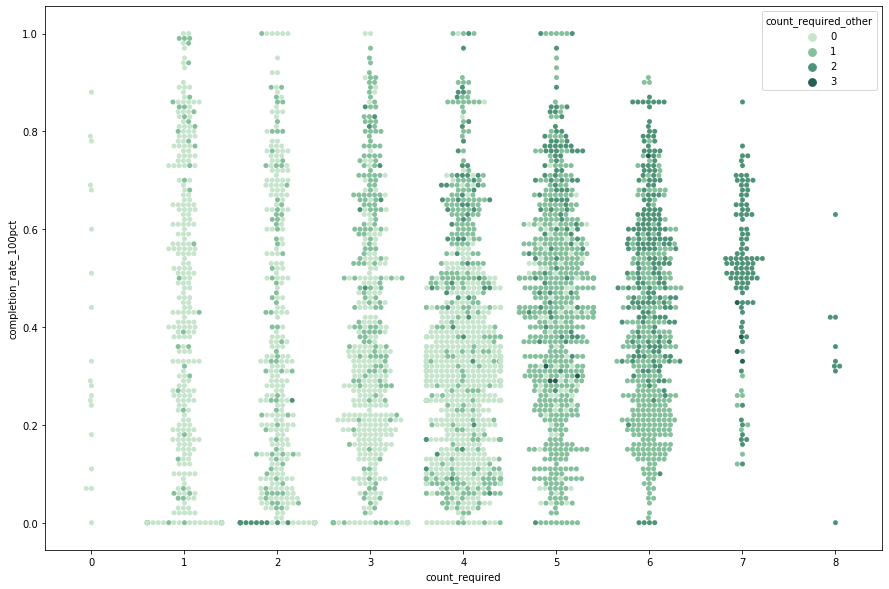

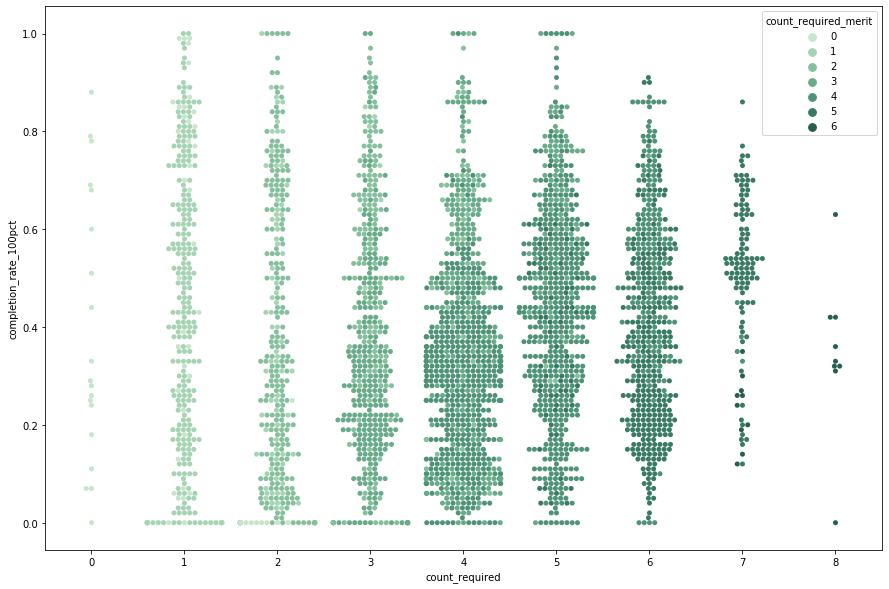

In [0]:
# visualize merit vs. other for 100pct completion

plt.figure(figsize=(15,10))
sns.swarmplot(x='count_required', y='completion_rate_100pct', hue='count_required_other', palette="ch:2.5,-.2,dark=.3", data=data_grads_clean)
plt.show()

plt.figure(figsize=(15,10))
sns.swarmplot(x='count_required', y='completion_rate_100pct', hue='count_required_merit', palette="ch:2.5,-.2,dark=.3", data=data_grads_clean)
plt.show()

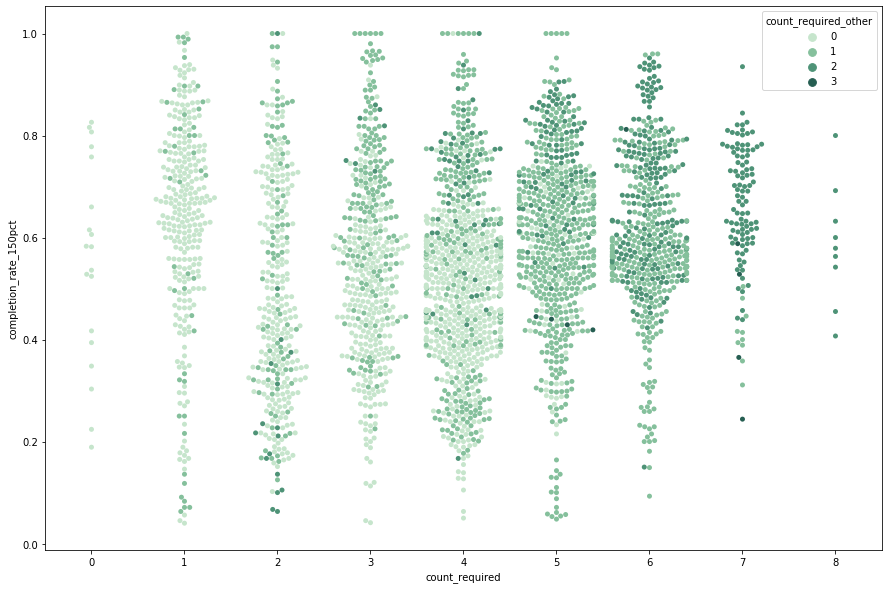

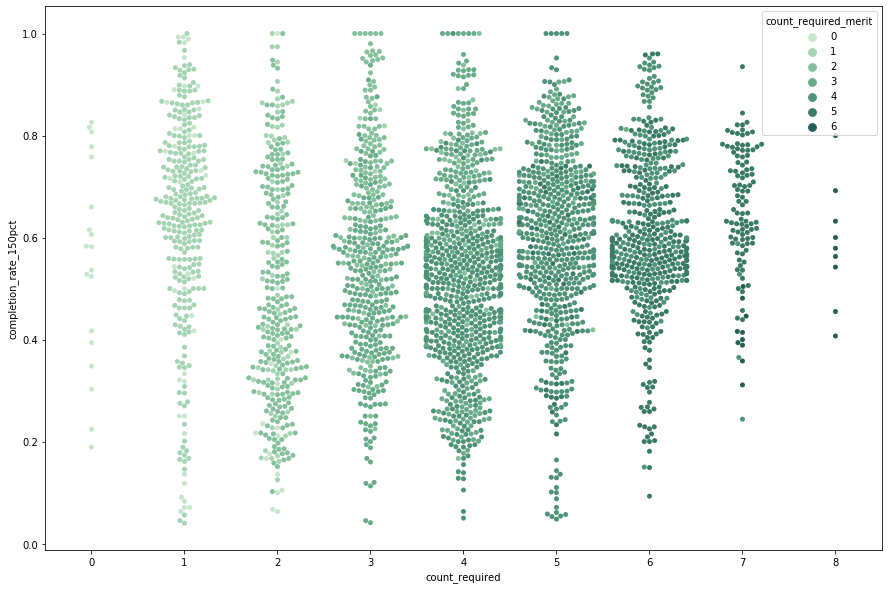

In [0]:
# visualize merit vs. other for 150pct completion

plt.figure(figsize=(15,10))
sns.swarmplot(x='count_required', y='completion_rate_150pct', hue='count_required_other', palette="ch:2.5,-.2,dark=.3", data=data_grads_clean)
plt.show()

plt.figure(figsize=(15,10))
sns.swarmplot(x='count_required', y='completion_rate_150pct', hue='count_required_merit', palette="ch:2.5,-.2,dark=.3", data=data_grads_clean)
plt.show()

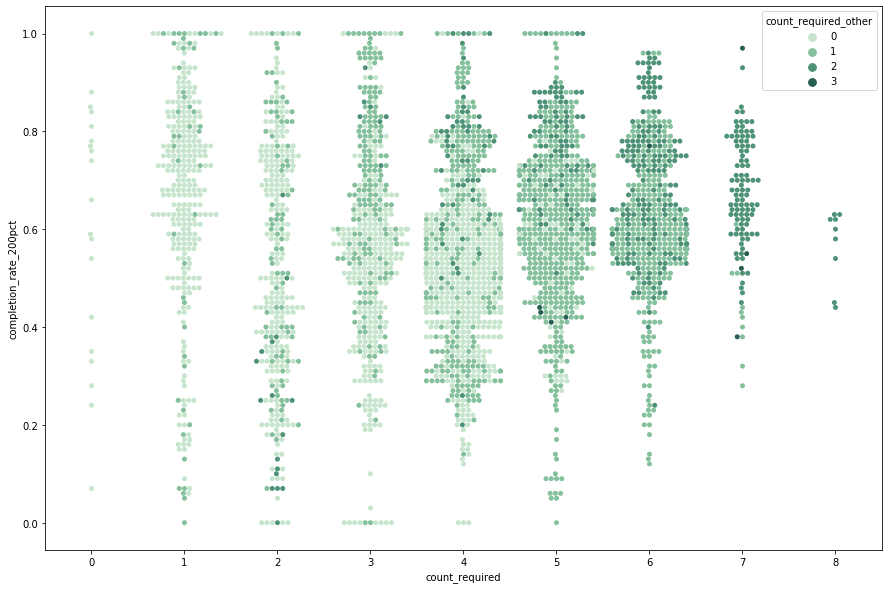

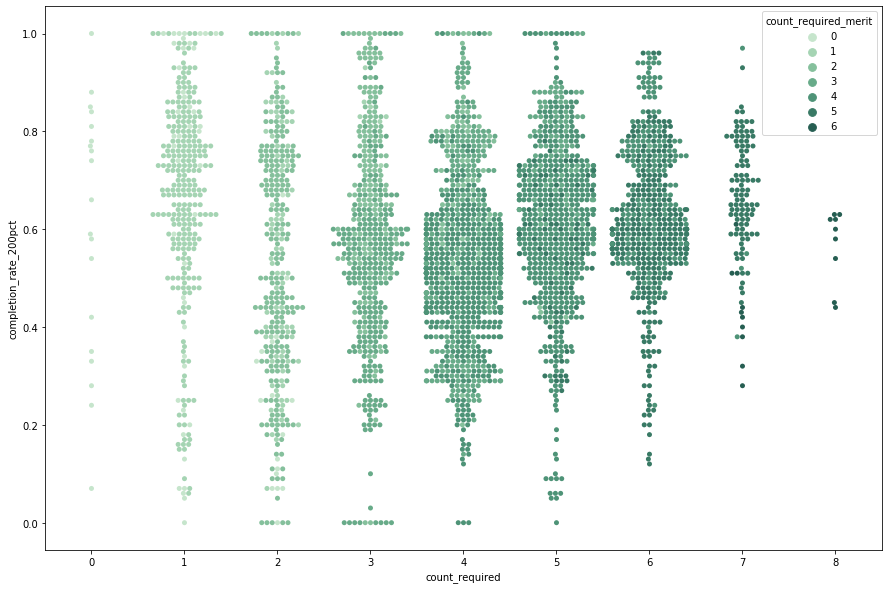

In [0]:
# visualize merit vs. other for 200pct completion

plt.figure(figsize=(15,10))
sns.swarmplot(x='count_required', y='completion_rate_200pct', hue='count_required_other', palette="ch:2.5,-.2,dark=.3", data=data_grads_clean)
plt.show()

plt.figure(figsize=(15,10))
sns.swarmplot(x='count_required', y='completion_rate_200pct', hue='count_required_merit', palette="ch:2.5,-.2,dark=.3", data=data_grads_clean)
plt.show()



Another part of my study was to look at differences in count_required and completion rate correlations among states. My data contained records from 5 states. 

I checked the correlations for count_required, count_required_merit, and count_required_other.


In [0]:
# prepare data for state comparison of count_required vs. completion rates

data_grads_mi = data_grads_clean[(data_grads_clean['state_name'] == 'Michigan')]
data_grads_wi = data_grads_clean[(data_grads_clean['state_name'] == 'Wisconsin')]
data_grads_in = data_grads_clean[(data_grads_clean['state_name'] == 'Indiana')]
data_grads_oh = data_grads_clean[(data_grads_clean['state_name'] == 'Ohio')]
data_grads_il = data_grads_clean[(data_grads_clean['state_name'] == 'Illinois')]

In [0]:
# test correlation with completion rates in Michigan

data_grads_mi.corr()

,year,unitid,completion_rate_100pct,completion_rate_200pct,completion_rate_150pct,count_required,count_requied_merit,count_required_other,count_required_merit
year,1.000000,-0.259227,-0.108094,-0.079771,-0.082364,0.257228,0.252542,0.124794,0.252542
unitid,-0.259227,1.000000,0.105118,-0.030596,0.044003,-0.495438,-0.521630,-0.179913,-0.521630
completion_rate_100pct,-0.108094,0.105118,1.000000,0.720136,0.718688,-0.043527,-0.211752,0.268986,-0.211752
completion_rate_200pct,-0.079771,-0.030596,0.720136,1.000000,0.783724,0.002177,-0.136540,0.239082,-0.136540
completion_rate_150pct,-0.082364,0.044003,0.718688,0.783724,1.000000,0.030626,-0.115572,0.264836,-0.115572
count_required,0.257228,-0.495438,-0.043527,0.002177,0.030626,1.000000,0.893427,0.636805,0.893427
count_requied_merit,0.252542,-0.521630,-0.211752,-0.136540,-0.115572,0.893427,1.000000,0.222588,1.000000
count_required_other,0.124794,-0.179913,0.268986,0.239082,0.264836,0.636805,0.222588,1.000000,0.222588
count_required_merit,0.252542,-0.521630,-0.211752,-0.136540,-0.115572,0.893427,1.000000,0.222588,1.000000


In [0]:
# test correlation with completion rates in Wisconsin

data_grads_wi.corr()

,year,unitid,completion_rate_100pct,completion_rate_200pct,completion_rate_150pct,count_required,count_requied_merit,count_required_other,count_required_merit
year,1.000000,-0.018972,-0.041923,-0.110988,-0.065169,0.049397,0.060360,-0.001953,0.060360
unitid,-0.018972,1.000000,0.064193,0.013923,0.060093,-0.363487,-0.389740,-0.108759,-0.389740
completion_rate_100pct,-0.041923,0.064193,1.000000,0.779586,0.677244,-0.136916,-0.221050,0.127035,-0.221050
completion_rate_200pct,-0.110988,0.013923,0.779586,1.000000,0.843196,-0.014494,-0.121418,0.235244,-0.121418
completion_rate_150pct,-0.065169,0.060093,0.677244,0.843196,1.000000,0.014169,-0.105321,0.276939,-0.105321
count_required,0.049397,-0.363487,-0.136916,-0.014494,0.014169,1.000000,0.936279,0.606834,0.936279
count_requied_merit,0.060360,-0.389740,-0.221050,-0.121418,-0.105321,0.936279,1.000000,0.288977,1.000000
count_required_other,-0.001953,-0.108759,0.127035,0.235244,0.276939,0.606834,0.288977,1.000000,0.288977
count_required_merit,0.060360,-0.389740,-0.221050,-0.121418,-0.105321,0.936279,1.000000,0.288977,1.000000


In [0]:
# test correlation with completion rates in Indiana

data_grads_in.corr()

,year,unitid,completion_rate_100pct,completion_rate_200pct,completion_rate_150pct,count_required,count_requied_merit,count_required_other,count_required_merit
year,1.000000,-0.148297,0.012192,-0.044246,0.009713,0.064765,0.102973,-0.029964,0.102973
unitid,-0.148297,1.000000,0.040680,0.075529,-0.000323,-0.431429,-0.452833,-0.204306,-0.452833
completion_rate_100pct,0.012192,0.040680,1.000000,0.878156,0.828686,0.203699,0.124035,0.252005,0.124035
completion_rate_200pct,-0.044246,0.075529,0.878156,1.000000,0.885696,0.172997,0.064612,0.284591,0.064612
completion_rate_150pct,0.009713,-0.000323,0.828686,0.885696,1.000000,0.232385,0.137132,0.295067,0.137132
count_required,0.064765,-0.431429,0.203699,0.172997,0.232385,1.000000,0.913520,0.709360,0.913520
count_requied_merit,0.102973,-0.452833,0.124035,0.064612,0.137132,0.913520,1.000000,0.361287,1.000000
count_required_other,-0.029964,-0.204306,0.252005,0.284591,0.295067,0.709360,0.361287,1.000000,0.361287
count_required_merit,0.102973,-0.452833,0.124035,0.064612,0.137132,0.913520,1.000000,0.361287,1.000000


In [0]:
# test correlation with completion rates in Illinois

data_grads_il.corr()

,year,unitid,completion_rate_100pct,completion_rate_200pct,completion_rate_150pct,count_required,count_requied_merit,count_required_other,count_required_merit
year,1.000000,-0.163611,0.014617,-0.073198,-0.058406,0.161639,0.149289,0.085598,0.149289
unitid,-0.163611,1.000000,0.050158,0.097867,0.059048,-0.517430,-0.507102,-0.216617,-0.507102
completion_rate_100pct,0.014617,0.050158,1.000000,0.743052,0.712226,0.099302,0.010644,0.211904,0.010644
completion_rate_200pct,-0.073198,0.097867,0.743052,1.000000,0.806995,0.022506,-0.050778,0.152553,-0.050778
completion_rate_150pct,-0.058406,0.059048,0.712226,0.806995,1.000000,0.069144,-0.036674,0.234184,-0.036674
count_required,0.161639,-0.517430,0.099302,0.022506,0.069144,1.000000,0.907103,0.561976,0.907103
count_requied_merit,0.149289,-0.507102,0.010644,-0.050778,-0.036674,0.907103,1.000000,0.161612,1.000000
count_required_other,0.085598,-0.216617,0.211904,0.152553,0.234184,0.561976,0.161612,1.000000,0.161612
count_required_merit,0.149289,-0.507102,0.010644,-0.050778,-0.036674,0.907103,1.000000,0.161612,1.000000


In [0]:
# test correlation with completion rates in Ohio

data_grads_oh.corr()

,year,unitid,completion_rate_100pct,completion_rate_200pct,completion_rate_150pct,count_required,count_requied_merit,count_required_other,count_required_merit
year,1.000000,-0.151994,0.037591,-0.082875,-0.040278,0.151437,0.146020,0.081884,0.146020
unitid,-0.151994,1.000000,0.001052,0.074234,0.038702,-0.424384,-0.427831,-0.196416,-0.427831
completion_rate_100pct,0.037591,0.001052,1.000000,0.725162,0.644739,0.114354,-0.022978,0.298276,-0.022978
completion_rate_200pct,-0.082875,0.074234,0.725162,1.000000,0.738247,0.049868,-0.105484,0.299478,-0.105484
completion_rate_150pct,-0.040278,0.038702,0.644739,0.738247,1.000000,0.082789,-0.075730,0.320810,-0.075730
count_required,0.151437,-0.424384,0.114354,0.049868,0.082789,1.000000,0.903371,0.648713,0.903371
count_requied_merit,0.146020,-0.427831,-0.022978,-0.105484,-0.075730,0.903371,1.000000,0.259652,1.000000
count_required_other,0.081884,-0.196416,0.298276,0.299478,0.320810,0.648713,0.259652,1.000000,0.259652
count_required_merit,0.146020,-0.427831,-0.022978,-0.105484,-0.075730,0.903371,1.000000,0.259652,1.000000


The same results for correlations with count_required_other vs. count_required and count_required_merit existed among states with count_required_other having the highest correlations with completion at each rate.

Indiana appeared to have a weak positive correlation with count_required at each completion rate, yet the correlation with count_required_other was higher than that of count_required in Indiana for each completion rate.





Below are visualizations by state of the difference between count_required_merit and count_required_other using seaborn scatterplots. 

The data being plotted is count_required by completion rate, with the hue as count_required_merit or count_required_other to show the composition of count_required.

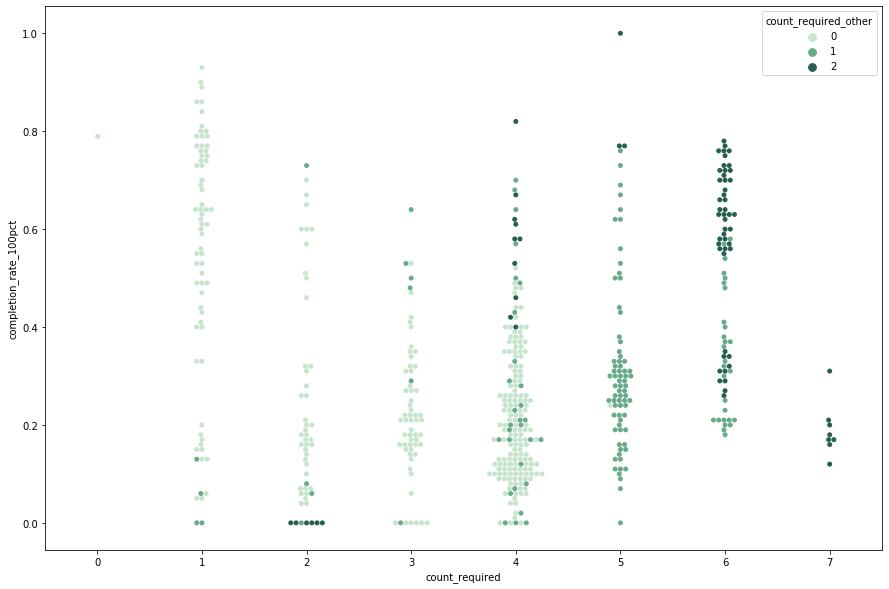

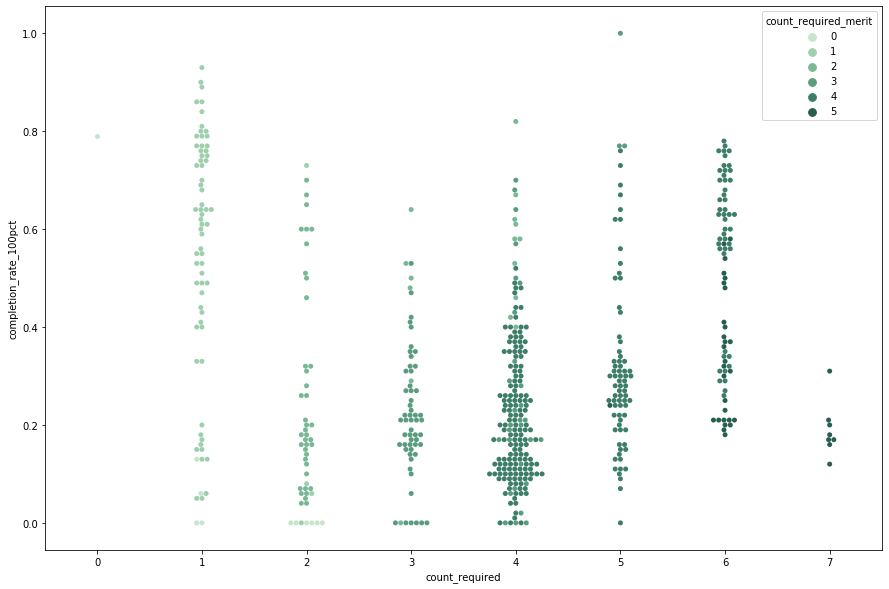

In [0]:
# visualize merit vs. other for Michigan for 100pct rate

plt.figure(figsize=(15,10))
sns.swarmplot(x='count_required', y='completion_rate_100pct', hue='count_required_other', palette="ch:2.5,-.2,dark=.3", data=data_grads_mi)
plt.show()

plt.figure(figsize=(15,10))
sns.swarmplot(x='count_required', y='completion_rate_100pct', hue='count_required_merit', palette="ch:2.5,-.2,dark=.3", data=data_grads_mi)
plt.show()


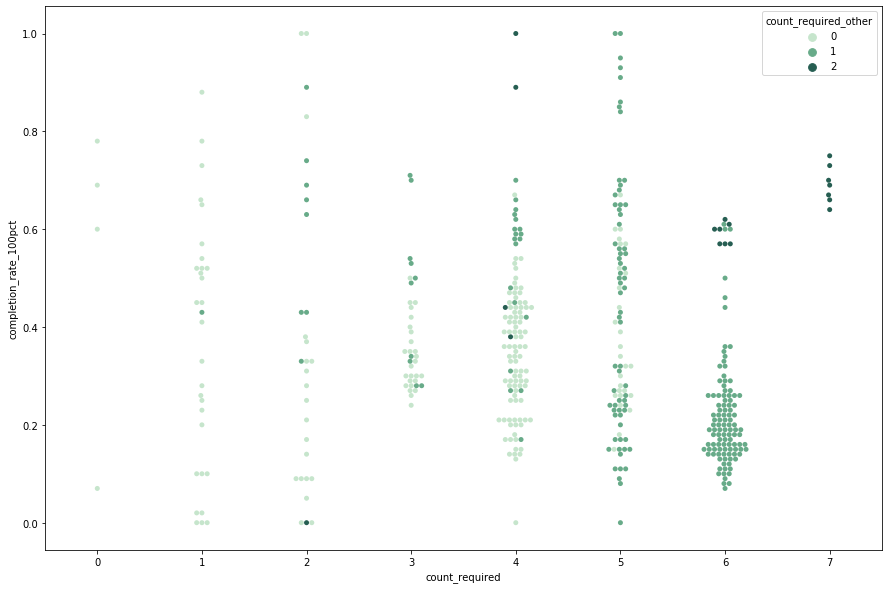

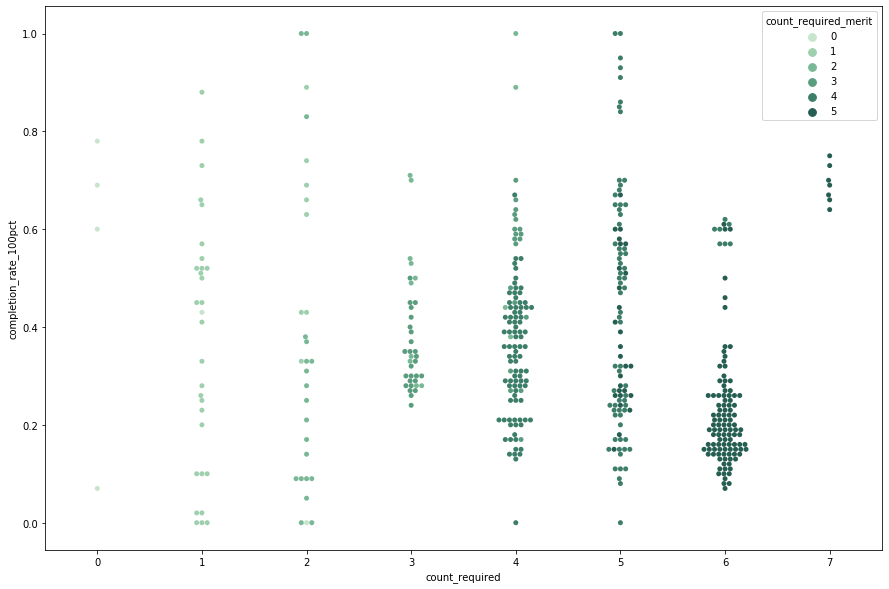

In [0]:
# visualize merit vs. other for Wisconsin for 100pct rate

plt.figure(figsize=(15,10))
sns.swarmplot(x='count_required', y='completion_rate_100pct', hue='count_required_other', palette="ch:2.5,-.2,dark=.3", data=data_grads_wi)
plt.show()

plt.figure(figsize=(15,10))
sns.swarmplot(x='count_required', y='completion_rate_100pct', hue='count_required_merit', palette="ch:2.5,-.2,dark=.3", data=data_grads_wi)
plt.show()

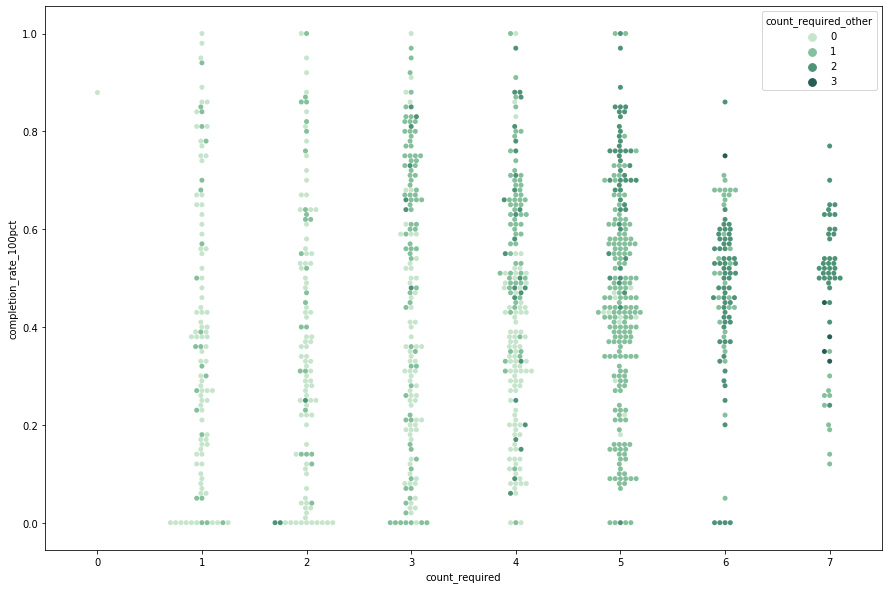

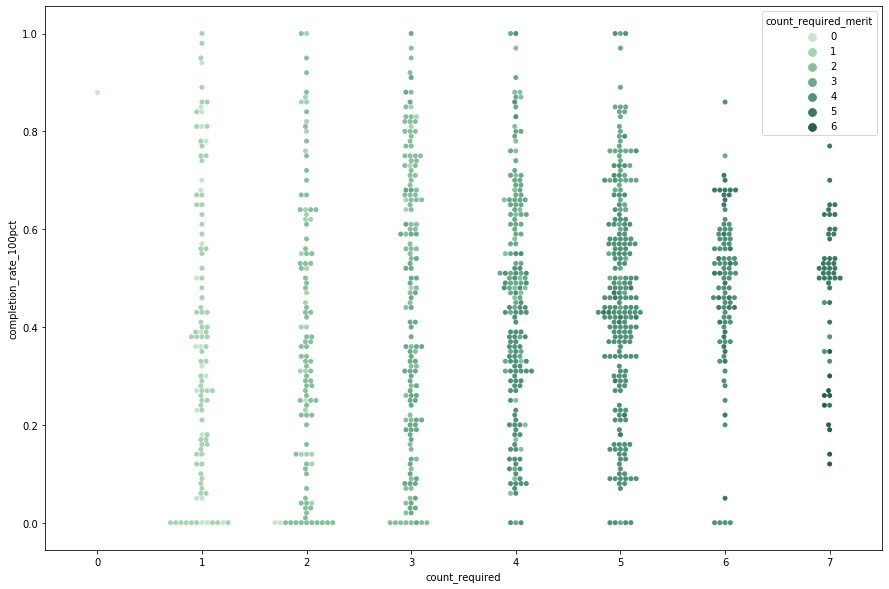

In [0]:
# visualize merit vs. other for Ohio for 100pct rate

plt.figure(figsize=(15,10))
sns.swarmplot(x='count_required', y='completion_rate_100pct', hue='count_required_other', palette="ch:2.5,-.2,dark=.3", data=data_grads_oh)
plt.show()

plt.figure(figsize=(15,10))
sns.swarmplot(x='count_required', y='completion_rate_100pct', hue='count_required_merit', palette="ch:2.5,-.2,dark=.3", data=data_grads_oh)
plt.show()

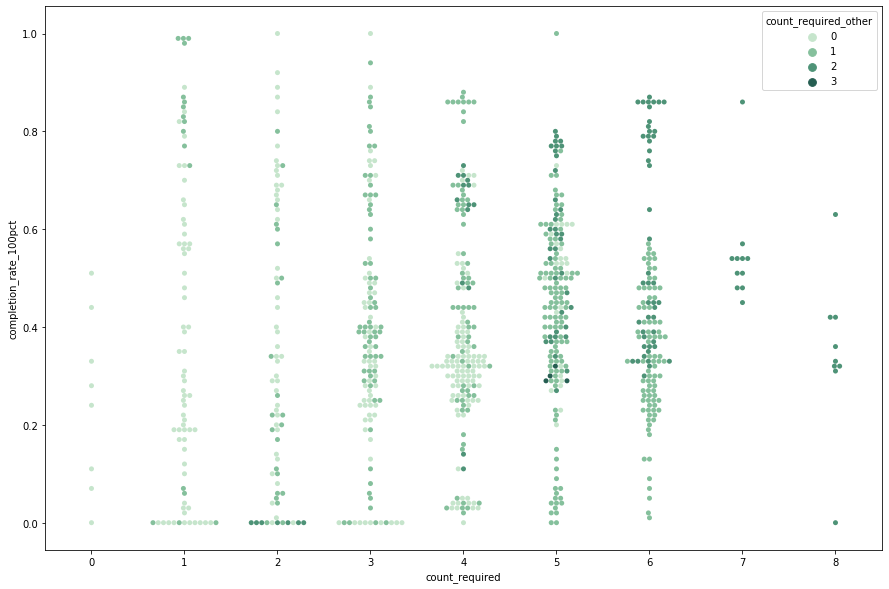

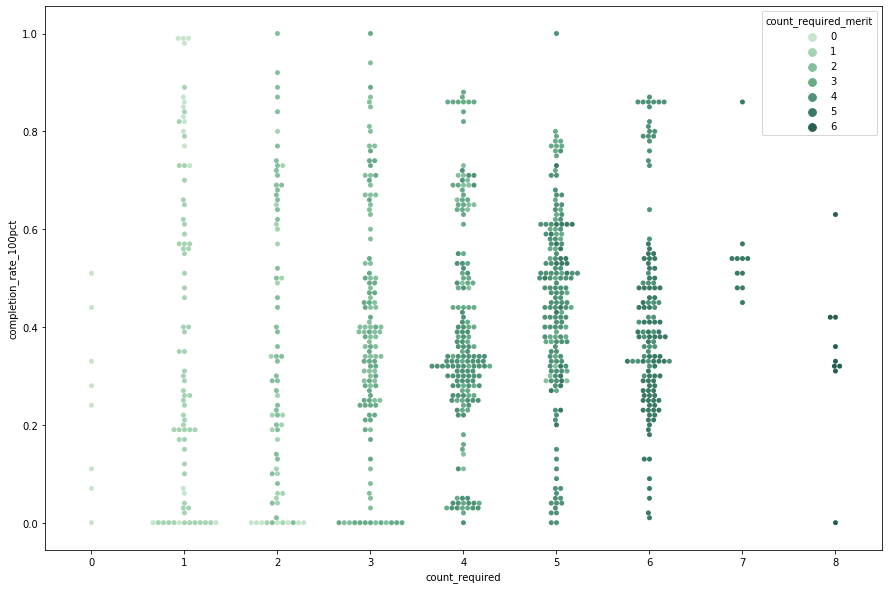

In [0]:
# visualize merit vs. other for Illinois for 100pct rate

plt.figure(figsize=(15,10))
sns.swarmplot(x='count_required', y='completion_rate_100pct', hue='count_required_other', palette="ch:2.5,-.2,dark=.3", data=data_grads_il)
plt.show()

plt.figure(figsize=(15,10))
sns.swarmplot(x='count_required', y='completion_rate_100pct', hue='count_required_merit', palette="ch:2.5,-.2,dark=.3", data=data_grads_il)
plt.show()

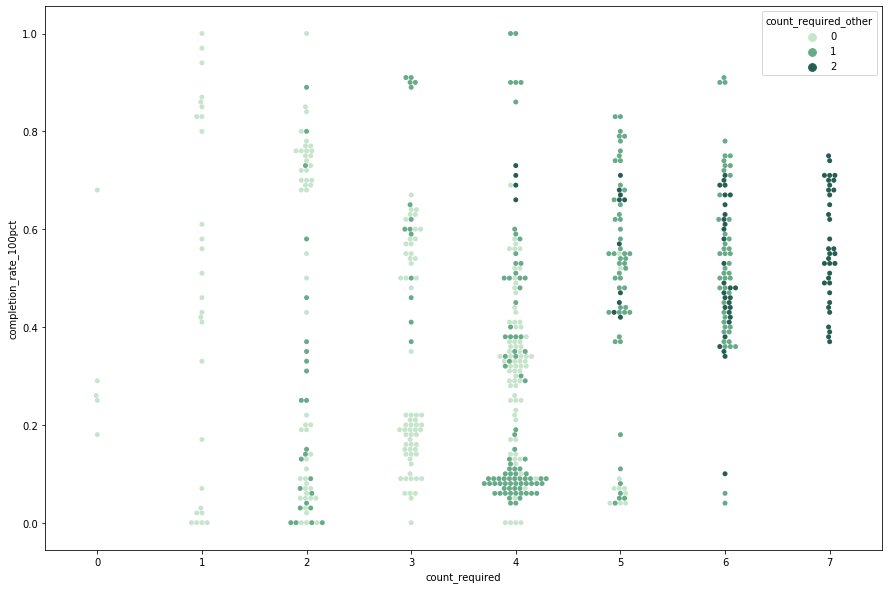

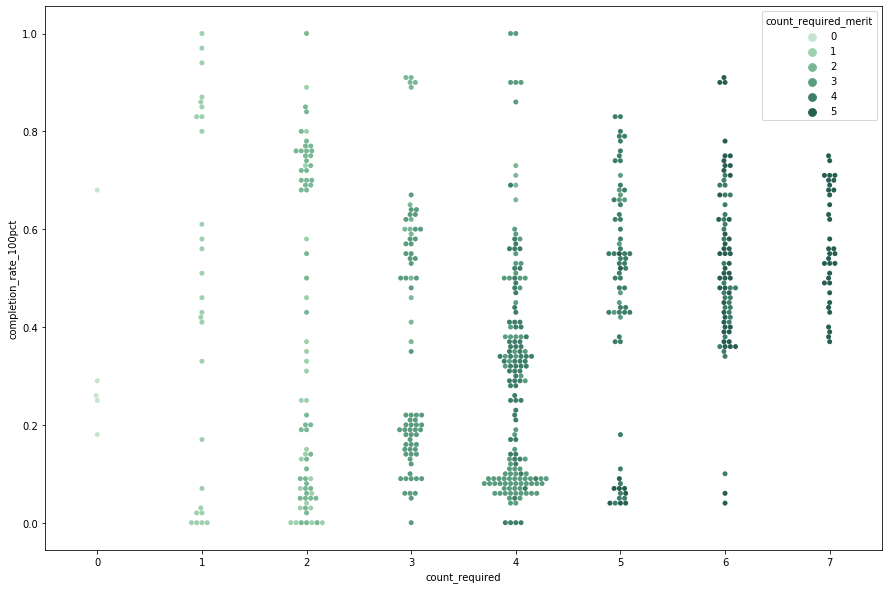

In [0]:
# visualize merit vs. other for Indiana for 100pct rate

plt.figure(figsize=(15,10))
sns.swarmplot(x='count_required', y='completion_rate_100pct', hue='count_required_other', palette="ch:2.5,-.2,dark=.3", data=data_grads_in)
plt.show()

plt.figure(figsize=(15,10))
sns.swarmplot(x='count_required', y='completion_rate_100pct', hue='count_required_merit', palette="ch:2.5,-.2,dark=.3", data=data_grads_in)
plt.show()

# Discussion & recommendations

Of interest was the difference in completion rates at the 100, 150, and 200 percent of normal time for the count_required quartiles. Specifically the jump from quartile 3 to quartile 1. 

Graphically and statistically this jump is clear and suggests that while there may not be a general correlation between requirements and graduation rates, there seems to be an increase in the correlation when 5 or more requirements are required. There also seemed to be a "diminishing returns" beyond 5 or more as the correlation with completion rate dropped slightly at 6 or more, and 7 or more requirements.

Statistics from 5 or more requirements at each completion rate:

100 percent rate = (r = 0.135182428757144,  p-value = 1.9467130989752814e-14)

150 percent rate = (r = 0.16939035341800604, p-value = 6.81185862990568e-22)

200 percent rate = (r = 0.13810502011470657, p-value = 5.2336862862634545e-15)

Additionally of interest was the trend observed for count_required_other vs. count_required_merit. That trend being the greater correlation with completion rates for count_required_other compared to count_required_merit at each completion rate. This brings in to question which specific combination or individual requirements may contribute most to completion rates. Or to extrapolate that point a bit, which admission requirement (or combination) is the most predictive of selecting a student who will graduate.

The state comparison showed a much higher correlation in Indiana between admission requirements and completion rates compared to not only the correlation in general, but also to that of each state. 

In each case among the states, the count_required_other group had the highest correlation with completion rates (as high as r = 0.320810 in one state).

This draws attention to the use of merit based factors like rank, test scores, and gpa as predictors of graduation as potentially non-predictive from an admissions standpoint. 

Further research could be done around examining which admission requirements carry the strongest weight that are not merit based. And/or, a study of what would happen to application numbers if merit based requirements were lifted in favor of non-merit based requirements.


Ultimately, this experiment does not indicate admission requirements as strong or reliable indicators of a student's ability to graduate. However, it does raise questions around non-merit based admission requirements and a reason to do further research on those and their impact. Additionally, the results presented could indicate a "sweet spot" for admission requirements at 5, or 5 or more requirements as having a very small positive predictive correlation. For administrators at an institution in an admissions office, this experiment could direct them to answer these questions in the hopes of increasing the efficacy of their admission requirements in not only reducing the number of applications but also in selecting students who will be successful.



# Limitations

There are a few limitations to this experiment. 

First, admission requirements may have changed from the time they were instituted to the time a student graduated (or completed). Therefore, the results may not be representative of the greater population and are not "moment in time". A graduate may not have been impacted by an admission requirement that was instituted after the student was admitted, but before they graduated. However, this experiment does not consider those instances, and to do so would require studying institutions by year, and by type to narrow down the impact of admission requirements on graduates at the timeframes of 100, 150, and 200 percent of normal time.

Second, the amount of admission requirements when split into 2 groups resulted in 2 very small sample sizes. The count_required_other was only 4 values (0-3) and the count_required_merit was only 7 values (0-6). These and the resulting quartiles used for count_required could be inappropriately small samples to be using for correlations.

Third, the years_college_required variable was not used in this experiment and could have impacted the results.